In [8]:
# import python libraries and 
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
import xlrd
import seaborn as sns
%matplotlib inline
from sklearn.feature_extraction.text import CountVectorizer
import re, string, unicodedata
import os
from pyspark.ml.feature import HashingTF, IDF, Tokenizer
from pyspark.ml.feature import Word2Vec
import spacy
import math
import nbconvert
%matplotlib inline
import glob
#import gensim
import nltk
import inflection as inflect
from bs4 import BeautifulSoup
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer
from string import ascii_lowercase
import itertools, snowballstemmer
from pyspark.ml.feature import HashingTF, IDF, Tokenizer
from pyspark.ml.feature import Word2Vec
import spacy
from matplotlib.colors import rgb2hex
from matplotlib.patches import Polygon
from pyspark.sql.session import SparkSession
# instantiate Spark
#spark = SparkSession.builder.getOrCreate()

In [9]:
# import data
# Read the input csv data format
hs_input_df = pd.read_csv("..../_Surveydata.csv",encoding='latin-1',na_values=' ')
 

In [1]:
# the number of rows and columns of data to confirm all input rows and columns have been loaded

hs_input_df.shape

In [11]:
hs_input_df.head(5) # display the first five rows and all columns

,STATE,GEOSTR,DENSTR2,PRECALL,REPNUM,REPDEPTH,FMONTH,IDATE,IMONTH,IDAY,...,HCVPRIME,HCVPRIMA,HLTHPREG,PREGEVER,BRTHCNTL3,TYPCNTRL2,NOBCUSE2,PFCHLDFT,PRNTLVIT,REGION
0,New York,201,D,To be called,40136,28,April,4252014,4,25,...,Not asked or Missing,Not asked or Missing,Not asked or Missing,Not asked or Missing,NaN,NaN,NaN,Not asked or Missing,NaN,NYS exclusive of NYC
1,New York,202,D,To be called,10105,17,January,3162014,3,16,...,Not asked or Missing,Not asked or Missing,Not asked or Missing,Not asked or Missing,NaN,NaN,NaN,Not asked or Missing,NaN,New York City (NYC)
2,New York,201,D,To be called,110014,4,November,11292014,November,29,...,Not asked or Missing,Not asked or Missing,Not asked or Missing,Not asked or Missing,NaN,NaN,NaN,Not asked or Missing,NaN,NYS exclusive of NYC
3,New York,201,D,To be called,110083,6,November,11252014,November,25,...,Not asked or Missing,Not asked or Missing,Not asked or Missing,Not asked or Missing,NaN,NaN,NaN,Not asked or Missing,NaN,NYS exclusive of NYC
4,New York,202,D,To be called,50129,7,May,10052014,October,5,...,Not asked or Missing,Not asked or Missing,Not asked or Missing,Not asked or Missing,NaN,NaN,NaN,Not asked or Missing,NaN,New York City (NYC)


In [12]:
hs_input_df.describe() # Display input numerical data basic statistics

,GEOSTR,REPNUM,REPDEPTH,IDATE,IDAY,IYEAR,DISPCODE,SEQNO,PSU,NATTMPTS,NRECSEL,NRECSTR,STATERES,LADULT,NUMADULT,CTYCODE1
count,6865.000000,6865.000000,6865.000000,6.865000e+03,6865.000000,6865.000000,6865.000000,6.865000e+03,6.865000e+03,6865.000000,6865.000000,6.865000e+03,4696.0,4.00000,4696.000000,0.0
mean,133.034960,60953.909978,15.378296,6.296448e+06,13.682302,2014.004079,1117.028405,2.014003e+09,2.014003e+09,5.025929,24395.098471,6.740979e+06,1.0,1.50000,1.836244,NaN
std,46.506278,34767.914870,8.657853,3.372976e+06,8.583558,0.063739,37.590953,1.981899e+03,1.981899e+03,3.993500,11537.797632,5.109308e+06,0.0,0.57735,0.918520,NaN
min,101.000000,10001.000000,1.000000,1.022015e+06,1.000000,2014.000000,1100.000000,2.014000e+09,2.014000e+09,1.000000,14544.000000,1.724447e+06,1.0,1.00000,1.000000,NaN
25%,101.000000,30170.000000,8.000000,3.112014e+06,6.000000,2014.000000,1100.000000,2.014002e+09,2.014002e+09,2.000000,16600.000000,2.814308e+06,1.0,1.00000,1.000000,NaN
50%,102.000000,60039.000000,15.000000,6.042014e+06,12.000000,2014.000000,1100.000000,2.014003e+09,2.014003e+09,4.000000,21545.000000,2.835024e+06,1.0,1.50000,2.000000,NaN
75%,201.000000,90249.000000,23.000000,9.202014e+06,21.000000,2014.000000,1100.000000,2.014005e+09,2.014005e+09,7.000000,23130.000000,1.305867e+07,1.0,2.00000,2.000000,NaN
max,202.000000,120361.000000,30.000000,1.231201e+07,31.000000,2015.000000,1200.000000,2.014007e+09,2.014007e+09,17.000000,55650.000000,1.435876e+07,1.0,2.00000,17.000000,NaN


In [13]:
hs_input_df.info(null_counts=True,max_cols = 120) # print column information showing data types and null count

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6865 entries, 0 to 6864
Data columns (total 120 columns):
STATE        6865 non-null object
GEOSTR       6865 non-null int64
DENSTR2      6865 non-null object
PRECALL      6865 non-null object
REPNUM       6865 non-null int64
REPDEPTH     6865 non-null int64
FMONTH       6865 non-null object
IDATE        6865 non-null int64
IMONTH       6865 non-null object
IDAY         6865 non-null int64
IYEAR        6865 non-null int64
DISPCODE     6865 non-null int64
SEQNO        6865 non-null int64
PSU          6865 non-null int64
NATTMPTS     6865 non-null int64
NRECSEL      6865 non-null int64
NRECSTR      6865 non-null float64
PVTRESD1     6865 non-null object
COLGHOUS     6865 non-null object
STATERES     4696 non-null float64
CELLFON3     6865 non-null object
LADULT       4 non-null float64
NUMADULT     4696 non-null float64
GENHLTH      6865 non-null object
PHYSHLTH     6865 non-null object
MENTHLTH     6865 non-null object
POORHLTH     6865 

In [14]:
# lowercase column name and remove remove special characters

hs_input_df.columns = map(str.lower, hs_input_df.columns)
hs_input_df.columns = hs_input_df.columns.str.replace('_','')

In [15]:
hs_input_df.iloc[:,0:20].head()  # display first five rows and only 20 columns

,state,geostr,denstr2,precall,repnum,repdepth,fmonth,idate,imonth,iday,iyear,dispcode,seqno,psu,nattmpts,nrecsel,nrecstr,pvtresd1,colghous,stateres
0,New York,201,D,To be called,40136,28,April,4252014,4,25,2014,1200,2014000012,2014000012,2,16600,14358760.86,Missing,Missing,NaN
1,New York,202,D,To be called,10105,17,January,3162014,3,16,2014,1200,2014000013,2014000013,8,14544,13058665.94,Missing,Missing,NaN
2,New York,201,D,To be called,110014,4,November,11292014,November,29,2014,1200,2014000014,2014000014,8,16600,14358760.86,Missing,Missing,NaN
3,New York,201,D,To be called,110083,6,November,11252014,November,25,2014,1200,2014000015,2014000015,9,16600,14358760.86,Missing,Missing,NaN
4,New York,202,D,To be called,50129,7,May,10052014,October,5,2014,1200,2014000016,2014000016,8,14544,13058665.94,Missing,Missing,NaN


In [16]:
hs_input_df.iloc[:,21:40].head() # display first five rows and only columns 21 to 40

,ladult,numadult,genhlth,physhlth,menthlth,poorhlth,hlthpln1,exerany2,sleptim1,cvdinfr4,cvdcrhd4,cvdstrk3,asthma3,asthnow,chcscncr,chcocncr,chccopd,havarth3,addepev2
0,NaN,NaN,Very good,None,None,Not asked or Missing,Yes,No,Number of hours [1-24],Dont know/Not sure,No,No,No,Not asked or Missing,No,No,Yes,Yes,No
1,NaN,NaN,Very good,None,None,Not asked or Missing,Yes,Yes,Number of hours [1-24],No,No,No,No,Not asked or Missing,No,No,No,No,No
2,NaN,NaN,Good,Number of days,None,Number of days,Yes,Yes,Dont know/Not Sure,No,No,No,No,Not asked or Missing,No,No,No,No,No
3,NaN,NaN,Very good,None,None,Not asked or Missing,Yes,Yes,Number of hours [1-24],No,No,No,No,Not asked or Missing,Yes,No,No,No,No
4,NaN,NaN,Excellent,None,Number of days,None,Yes,Yes,Number of hours [1-24],No,No,No,No,Not asked or Missing,No,No,No,No,No


In [17]:
hs_input_df.iloc[:,41:60].head() # display first five rows and only columns 41 to 60

,diabete3,age,marital,children,educa,employ1,income2,weight2,height3,ctycode1,zipcode,sex,pregnant,qlactlm2,useequip,blind,decide,diffwalk,diffdres
0,No,Age 65 or older,Divorced,Number of children,College 1 year to 3 years (Some college or tec...,Retired,Dont know/Not sure,D,D,NaN,DSU,Male,Not asked or Missing,Yes,No,No,No,Yes,No
1,No,Age 65 or older,Divorced,None,College 4 years or more (College graduate),Retired,Less than $50000 ($35000 to less than $50000),D,D,NaN,DSU,Female,Not asked or Missing,No,No,No,No,No,No
2,No,Age 35 - 44,Married,Number of children,College 4 years or more (College graduate),A student,$75000 or more,D,D,NaN,DSU,Female,No,No,No,No,No,No,No
3,No,Age 65 or older,Married,None,College 4 years or more (College graduate),Retired,$75000 or more,D,D,NaN,DSU,Male,Not asked or Missing,No,No,No,No,No,No
4,No,Age 35 - 44,Married,None,College 4 years or more (College graduate),Employed for wages,$75000 or more,D,D,NaN,DSU,Female,No,No,No,No,No,No,No


In [18]:
hs_input_df.iloc[:,61:80].head() # display first five rows and only columns 61 to 80

,usenow3,alcday5,flshtmy2,pneuvac3,shingle2,seatbelt,drnkdri2,bldstool,pdiabtst,prediab1,asbirduc,htin4,htm4,wtkg3,bmi5,bmi5cat,rfbmi5,chldcnt,smoker3
0,Not at all,No drinks in past 30 days,Not asked or Missing,No,No,Always,Not asked or Missing,Yes,Not asked or Missing,Not asked or Missing,Not asked or Missing,D,D,D,1 or greater,Overweight,Yes,One child in household,Former smoker
1,Not at all,No drinks in past 30 days,Not asked or Missing,Yes,No,Always,Not asked or Missing,No,Not asked or Missing,Not asked or Missing,Not asked or Missing,D,D,D,1 or greater,Normal Weight,No,No children in household,Former smoker
2,Not at all,Days per week,Not asked or Missing,Not asked or Missing,Not asked or Missing,Not asked or Missing,Not asked or Missing,Not asked or Missing,Not asked or Missing,Not asked or Missing,Not asked or Missing,D,D,D,1 or greater,Normal Weight,No,One child in household,Current smoker - now smokes some days
3,Not at all,Days per week,Month / Year,Yes,No,Always,None,Yes,Not asked or Missing,Not asked or Missing,Not asked or Missing,D,D,D,1 or greater,Overweight,Yes,No children in household,Never smoked
4,Not at all,No drinks in past 30 days,Not asked or Missing,No,Not asked or Missing,Always,Not asked or Missing,Not asked or Missing,Not asked or Missing,Not asked or Missing,Not asked or Missing,D,D,D,1 or greater,Overweight,Yes,No children in household,Never smoked


In [19]:
hs_input_df.iloc[:,81:100].head() # display first five rows and only columns 81 to 100

,drnkany5,drocdy3,rfbing5,drnkdy4,drnkmo4,rfdrhv4,rfdrmn4,rfdrwm4,flshot6,pneumo2,rfseat2,rfseat3,rfblds2,rfblds3,hfob3yr,fobtfs,ssbsugar,ssbfrut2,healthcl1
0,No,No Drink-Occasions per day,No,Did not drink,Did not drink in the past month,No,No,Respondent is male,No,No,Always or Almost Always Wear Seat Belt,Always Wear Seat Belt,No,Hve not had a blood stool test in the past year,Did not receive a home FOBT within the past 3 ...,Did not receive a sigmoidoscopy within the pas...,Not asked or Missing,Not asked or Missing,Not asked or Missing
1,No,No Drink-Occasions per day,No,Did not drink,Did not drink in the past month,No,Respondent is female,No,No,Yes,Always or Almost Always Wear Seat Belt,Always Wear Seat Belt,No,Hve not had a blood stool test in the past year,Did not receive a home FOBT within the past 3 ...,Did not receive a sigmoidoscopy within the pas...,Not asked or Missing,Not asked or Missing,Not asked or Missing
2,Yes,Drink-Occasions per day,Dont know/Refused/Missing,Dont know/Not sure/Refused/Missing,Dont know/Refused/Missing,Dont know/Refused/Missing,Respondent is female,Dont know/Refused/Missing,Age Less Than 65,Age Less Than 65,Dont know/Not Sure Or Refused/Missing,Dont know/Not Sure Or Refused/Missing,Missing or Age less than 50,Missing Age less than 50 Age greater than 75,Missing or Age less than 50 or Age greater tha...,Missing or Age less than 50 or Age greater tha...,Not asked or Missing,Not asked or Missing,Not asked or Missing
3,Yes,Drink-Occasions per day,No,Number of drinks per day,Number of Drinks,No,No,Respondent is male,Yes,Yes,Always or Almost Always Wear Seat Belt,Always Wear Seat Belt,Yes,Had a blood stool test in the past year,Received a home FOBT within the past 3 years,Did have had a sigmoidoscopy within the past 5...,Not asked or Missing,Not asked or Missing,Not asked or Missing
4,No,No Drink-Occasions per day,No,Did not drink,Did not drink in the past month,No,Respondent is female,No,Age Less Than 65,Age Less Than 65,Always or Almost Always Wear Seat Belt,Always Wear Seat Belt,Missing or Age less than 50,Missing Age less than 50 Age greater than 75,Missing or Age less than 50 or Age greater tha...,Missing or Age less than 50 or Age greater tha...,Not asked or Missing,Not asked or Missing,Not asked or Missing


In [20]:
hs_input_df.iloc[:,101:120].head() # display first five rows and only columns 101 to 120

,cncsumm,cncinstr,cdcpaid,cncnoins,hcvhear,hcvtest,lasthcvt,hcvinpte,hcvinpta,hcvprime,hcvprima,hlthpreg,pregever,brthcntl3,typcntrl2,nobcuse2,pfchldft,prntlvit,region
0,Not asked or Missing,Not asked or Missing,Not asked or Missing,Not asked or Missing,Not asked or Missing,Not asked or Missing,NaN,Not asked or Missing,Not asked or Missing,Not asked or Missing,Not asked or Missing,Not asked or Missing,Not asked or Missing,NaN,NaN,NaN,Not asked or Missing,NaN,NYS exclusive of NYC
1,Not asked or Missing,Not asked or Missing,Not asked or Missing,Not asked or Missing,Not asked or Missing,Not asked or Missing,NaN,Not asked or Missing,Not asked or Missing,Not asked or Missing,Not asked or Missing,Not asked or Missing,Not asked or Missing,NaN,NaN,NaN,Not asked or Missing,NaN,New York City (NYC)
2,Not asked or Missing,Not asked or Missing,Not asked or Missing,Not asked or Missing,Not asked or Missing,Not asked or Missing,NaN,Not asked or Missing,Not asked or Missing,Not asked or Missing,Not asked or Missing,Not asked or Missing,Not asked or Missing,NaN,NaN,NaN,Not asked or Missing,NaN,NYS exclusive of NYC
3,Not asked or Missing,Not asked or Missing,Not asked or Missing,Not asked or Missing,Not asked or Missing,Not asked or Missing,NaN,Not asked or Missing,Not asked or Missing,Not asked or Missing,Not asked or Missing,Not asked or Missing,Not asked or Missing,NaN,NaN,NaN,Not asked or Missing,NaN,NYS exclusive of NYC
4,Not asked or Missing,Not asked or Missing,Not asked or Missing,Not asked or Missing,Not asked or Missing,Not asked or Missing,NaN,Not asked or Missing,Not asked or Missing,Not asked or Missing,Not asked or Missing,Not asked or Missing,Not asked or Missing,NaN,NaN,NaN,Not asked or Missing,NaN,New York City (NYC)


In [21]:
# Data cleaning
# The data cleaning process is implemented to drop redundant and duplicated variables that are not required,
# also create uniform datatypes in each column of dataframe.
# This process of cleaning each column will remove meta characters, numerical value
# in text columns and texts from numeric columns. This will produce same data type for all values of a
# variable. It will increase accuracy of plots, data engineering and modelling.
# The unique values in each columns will be examined for cleaning columns where necesary.
# functions are creted to clean numeric and objects data types respectively
# The count of unique values will be displayed before and after cleaning to check any deviation

In [22]:
# show percentage of zero values in each column

column_zero_count = (hs_input_df[hs_input_df == 0].count(axis=0)/len(hs_input_df.index))*100
column_zero_count[0:30] # print to check the last 30 columns

state       0.0
geostr      0.0
denstr2     0.0
precall     0.0
repnum      0.0
repdepth    0.0
fmonth      0.0
idate       0.0
imonth      0.0
iday        0.0
iyear       0.0
dispcode    0.0
seqno       0.0
psu         0.0
nattmpts    0.0
nrecsel     0.0
nrecstr     0.0
pvtresd1    0.0
colghous    0.0
stateres    0.0
cellfon3    0.0
ladult      0.0
numadult    0.0
genhlth     0.0
physhlth    0.0
menthlth    0.0
poorhlth    0.0
hlthpln1    0.0
exerany2    0.0
sleptim1    0.0
dtype: float64

In [23]:
# function to obtain the percentage of nan values in each column
def nan_percentage():
    ''' calcute the percentage of NaN values for each column in the dataframe and return only columns containing NaN and the percentage'''
    
    nandf = df.loc[:, df.isnull().any()]  # get columns containing nan values
    nan_percent = nandf.isnull().sum(axis = 0)/len(df)*100  # percentage of nan values
    
    return nan_percent
# call the function

df = hs_input_df
nan_percentage()

stateres      31.595047
ladult        99.941733
numadult      31.595047
ctycode1     100.000000
lasthcvt      89.075018
brthcntl3     93.648944
typcntrl2     96.445739
nobcuse2      97.916970
prntlvit      93.780044
dtype: float64

In [24]:
# dictionary of columns and the number of unique values in each column

column_dict = hs_input_df.iloc[:,0:120].nunique().to_dict()

column_dict

{'state': 1,
 'geostr': 4,
 'denstr2': 1,
 'precall': 4,
 'repnum': 3276,
 'repdepth': 30,
 'fmonth': 12,
 'idate': 334,
 'imonth': 12,
 'iday': 31,
 'iyear': 2,
 'dispcode': 2,
 'seqno': 6865,
 'psu': 6865,
 'nattmpts': 17,
 'nrecsel': 6,
 'nrecstr': 18,
 'pvtresd1': 3,
 'colghous': 2,
 'stateres': 1,
 'cellfon3': 2,
 'ladult': 2,
 'numadult': 8,
 'genhlth': 7,
 'physhlth': 4,
 'menthlth': 4,
 'poorhlth': 5,
 'hlthpln1': 4,
 'exerany2': 4,
 'sleptim1': 3,
 'cvdinfr4': 4,
 'cvdcrhd4': 4,
 'cvdstrk3': 4,
 'asthma3': 4,
 'asthnow': 5,
 'chcscncr': 4,
 'chcocncr': 4,
 'chccopd': 4,
 'havarth3': 4,
 'addepev2': 4,
 'chckidny': 4,
 'diabete3': 6,
 'age': 8,
 'marital': 8,
 'children': 4,
 'educa': 8,
 'employ1': 10,
 'income2': 11,
 'weight2': 1,
 'height3': 1,
 'ctycode1': 0,
 'zipcode': 1,
 'sex': 2,
 'pregnant': 5,
 'qlactlm2': 5,
 'useequip': 5,
 'blind': 5,
 'decide': 5,
 'diffwalk': 5,
 'diffdres': 5,
 'diffalon': 5,
 'usenow3': 6,
 'alcday5': 6,
 'flshtmy2': 6,
 'pneuvac3': 5,
 'shin

In [25]:
# drop columns with more than 60 percent null values

# these columns are constant,repeated demographic and filling information columns to be dropped

drop_col_1 = ['state','repnum','fmonth','idate','dispcode','seqno','psu',
             'htin4','htm4','wtkg3','bmi5','psu','rfbmi5','rfsmok3','drnkany5','rfbing5',
             'drnkdy4','drnkmo4','rfseat3','denstr2','stateres','weight2','height3','zipcode']
null_column = ['ladult','ctycode1','lasthcvt','brthcntl3','typcntrl2','nobcuse2','prntlvit','prntlvit']

hs_clean_df = hs_input_df.copy()

hs_clean_df = hs_clean_df.drop(hs_clean_df[null_column], axis = 1)

hs_clean_df = hs_clean_df.drop(hs_clean_df[drop_col_1], axis = 1)

In [26]:
# check the percentage of zero values
# Function to calculate percentage of zero values in each variable of the dataset.
# predictor variables where 99 to 100% of values are zero are dropped at this stage

def zero_percentage():
    ''' calcute the percentage of zero values for each column in the dataframe and return only columns
    containing zero values and the percentage'''
    column_zero_count = df[df == 0].count(axis=0).any()  # get columns containing zero values
    
    zero_percent = column_zero_count/len(df)*100          # percentage of zero values
    
    return zero_percent

# call the function
df = hs_clean_df
zero_percentage()

0.0

In [27]:
# 2.1 create a function to clean integer type data

def integer_clean(df):
    '''return dataframe for integer data to retain only the digits (and dot and minus sign).
    This would remove characters, alphabets or anything that is not defined in to_replace attribute
    quality control data after cleaning
    '''
    df = df.loc[:, df.dtypes == np.int64].replace(regex=True, to_replace=r'[^0-9.\-]', value=r'')
    
    return df

# call function

In [28]:
# 2.2 create a function to clean float type data.

def float_clean(df):
    '''return dataframe for integer data to retain only the digits (and dot and minus sign).
    This would remove characters, alphabets or anything that is not defined in to_replace attribute
    quality control data after cleaning
    '''
    df = df.loc[:, df.dtypes == np.float64].replace(regex=True, to_replace=r'[^0-9.\-]', value=r'')
    
    return df
   
#call function

In [29]:
# 2.3 create a function to clean string data.

def clean_text(df = df, col= 'make'):
    '''This function returns a pandas list object of the given dataframe and column.
    The values of the column will be changed to lower case, remove spaces, punctuations and numbers,
    replace lines with non ascii characters that might exist'''
    
    df[col]= df[col].str.strip().str.lower().str.replace(' ', '').str.replace('[^\w\s]','').apply(lambda x: x.translate(string.punctuation)).apply(lambda x: x.translate(string.digits)).str.replace('[#%\'()*+,-./:;<=>?@\[\]^_`{|}~1234567890’”“′‘\\\]','').str.replace(r'[^\x00-\x7f]', '')
    
    return df[col]
    
#call function

In [30]:
# descriptive statistics

hs_clean_df.describe()

,geostr,repdepth,iday,iyear,nattmpts,nrecsel,nrecstr,numadult
count,6865.000000,6865.000000,6865.000000,6865.000000,6865.000000,6865.000000,6.865000e+03,4696.000000
mean,133.034960,15.378296,13.682302,2014.004079,5.025929,24395.098471,6.740979e+06,1.836244
std,46.506278,8.657853,8.583558,0.063739,3.993500,11537.797632,5.109308e+06,0.918520
min,101.000000,1.000000,1.000000,2014.000000,1.000000,14544.000000,1.724447e+06,1.000000
25%,101.000000,8.000000,6.000000,2014.000000,2.000000,16600.000000,2.814308e+06,1.000000
50%,102.000000,15.000000,12.000000,2014.000000,4.000000,21545.000000,2.835024e+06,2.000000
75%,201.000000,23.000000,21.000000,2014.000000,7.000000,23130.000000,1.305867e+07,2.000000
max,202.000000,30.000000,31.000000,2015.000000,17.000000,55650.000000,1.435876e+07,17.000000


In [31]:
# comment
# The mean and standard deviation of repdepth and numadult indicates outlier values for these features

In [32]:
hs_clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6865 entries, 0 to 6864
Data columns (total 90 columns):
geostr       6865 non-null int64
precall      6865 non-null object
repdepth     6865 non-null int64
imonth       6865 non-null object
iday         6865 non-null int64
iyear        6865 non-null int64
nattmpts     6865 non-null int64
nrecsel      6865 non-null int64
nrecstr      6865 non-null float64
pvtresd1     6865 non-null object
colghous     6865 non-null object
cellfon3     6865 non-null object
numadult     4696 non-null float64
genhlth      6865 non-null object
physhlth     6865 non-null object
menthlth     6865 non-null object
poorhlth     6865 non-null object
hlthpln1     6865 non-null object
exerany2     6865 non-null object
sleptim1     6865 non-null object
cvdinfr4     6865 non-null object
cvdcrhd4     6865 non-null object
cvdstrk3     6865 non-null object
asthma3      6865 non-null object
asthnow      6865 non-null object
chcscncr     6865 non-null object
chcocncr     

In [33]:
# save to disc

# Save the cleaned dataframe to disk1 as a csv file

hs_clean_df.to_csv("...../_clean_df.csv")   # save out the data to disc


In [34]:
# Exploration Data Analysis and visualisation
# create dataframe for visualisation plots
'''
The task in this project is classification, therefore this analysis explore the data that will
adequately give a differentiation or separation of the samples using the binary classifier.

The plots are produced using Matplotlib and Seaborn libraries
The visualisation will show relationship between input features or variables.

Visualise data distribution of each variable for skew correction

This will also help to discover trend and patterns in the data and to understand data characteristics.

The Analysis is also aimed at discovering relationships that will be useful in data engineering.

Plot include univariate plots using Histogram, Barplot, Bivariate plots such as Boxplots, Multivariate scatter plots and cluster plots

'''
plot = 'plot'

In [35]:
# the target variable for this model building is 'diabete3'

hs_plot_df = hs_clean_df.copy() # create dataframe for plots

# select data where diabete3 is Yes or No which will be used for modelling as the are
# individuals where diabete3 is 100% and not recorded as conditional hence considered
# best label for diabete3 modelling in the dataset.
# Those on boderline or seen during pregnancy may not have other variable similar to diabete3 individuals


hs_plot_df = hs_plot_df[(hs_plot_df.diabete3 == 'Yes') | (hs_plot_df.diabete3 == 'No')]


<Figure size 288x216 with 0 Axes>

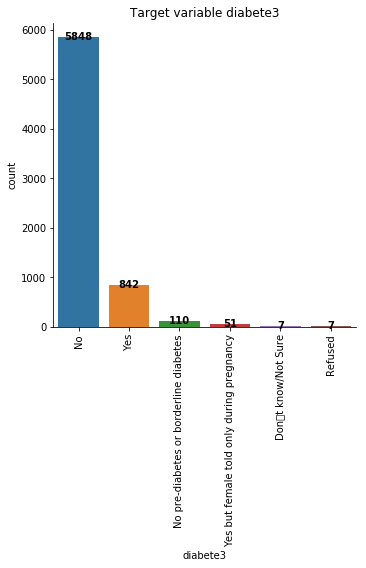

In [47]:
plt.figure(figsize=(4, 3))
plot = sns.catplot(x='diabete3', kind='count',data=hs_clean_df)

# plot.ax gives the axis object
# plot.ax.patches gives list of bars that can be access using index starting at 0

for i, kind in enumerate(plot.ax.patches):
    h = kind.get_height()
    plot.ax.text(
        i, # bar index (x coordinate of text)
        h+10, # y coordinate of text
        '{}'.format(int(h)),  # y label
        ha='center', 
        va='center', 
        fontweight='bold', 
        size=10)
    plt.title('Target variable diabete3')
    plt.xticks(rotation='vertical')

In [ ]:
#comments
# The target variable classes are imbalanced and will need to be enoded to numbers
# No DIABETE3 is the majority class

<Figure size 288x216 with 0 Axes>

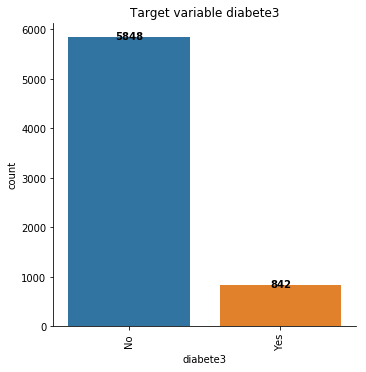

In [48]:
plt.figure(figsize=(4, 3))
plot = sns.catplot(x='diabete3', kind='count',data=hs_plot_df)

# plot.ax gives the axis object
# plot.ax.patches gives list of bars that can be access using index starting at 0

for i, kind in enumerate(plot.ax.patches):
    h = kind.get_height()
    plot.ax.text(
        i, # bar index (x coordinate of text)
        h+10, # y coordinate of text
        '{}'.format(int(h)),  # y label
        ha='center', 
        va='center', 
        fontweight='bold', 
        size=10)
    plt.title('Target variable diabete3')
    plt.xticks(rotation='vertical')

In [ ]:
# ommenton above plot
# plot using Yes and NO

<Figure size 288x216 with 0 Axes>

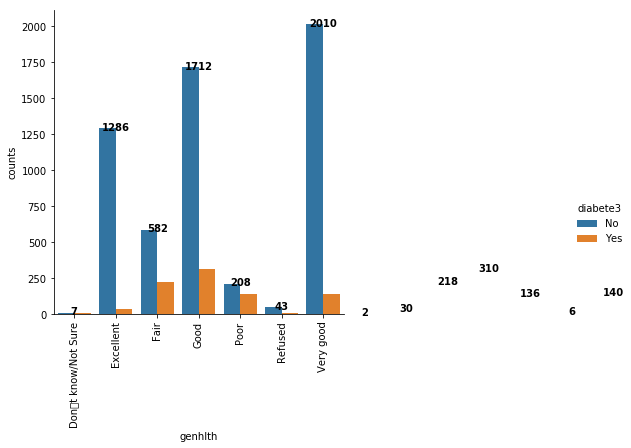

In [49]:
#ploting age categories with diabetes and count
ycount_df = hs_plot_df["diabete3"].groupby(hs_plot_df["genhlth"]).value_counts().rename("counts").reset_index()
#ycount_df

plt.figure(figsize=(4, 3))
plot = sns.catplot(x="genhlth", y="counts", hue="diabete3", data=ycount_df, kind='bar')
for i, kind in enumerate(plot.ax.patches):
    h = kind.get_height()
    plot.ax.text(
        i, # bar index (x coordinate of text)
        h+10, # y coordinate of text
        '{}'.format(int(h)),  # y label
        ha='center', 
        va='center', 
        fontweight='bold', 
        size=10)
plt.xticks(rotation='vertical')
plt.show()

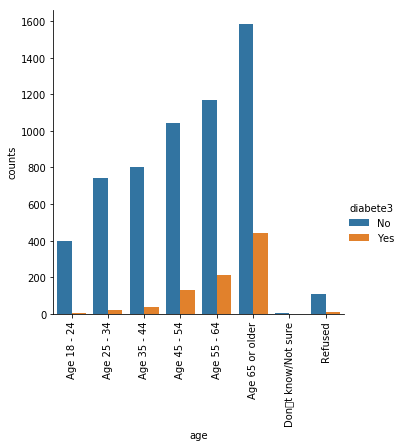

In [51]:
#ploting age categories with diabetes and count
ycount_df = hs_plot_df["diabete3"].groupby(hs_plot_df["age"]).value_counts().rename("counts").reset_index()
#ycount_df
sns.catplot(x="age", y="counts", hue="diabete3", data=ycount_df, kind='bar')

plt.xticks(rotation='vertical')
plt.show()



In [52]:
# comment
# The Yes class for DIOABETE3 is incresing with icrease in Age.

In [54]:
# select numeric features
hs_numeric_df = hs_plot_df.copy()

hs_numeric_df = hs_plot_df.loc[:, hs_plot_df.dtypes == np.float64]

hs_numeric_df2 = hs_plot_df.loc[:, hs_plot_df.dtypes == np.int64]

In [55]:
hs_numeric_df.info(), hs_numeric_df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6690 entries, 0 to 6864
Data columns (total 2 columns):
nrecstr     6690 non-null float64
numadult    4570 non-null float64
dtypes: float64(2)
memory usage: 476.8 KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 6690 entries, 0 to 6864
Data columns (total 6 columns):
geostr      6690 non-null int64
repdepth    6690 non-null int64
iday        6690 non-null int64
iyear       6690 non-null int64
nattmpts    6690 non-null int64
nrecsel     6690 non-null int64
dtypes: int64(6)
memory usage: 685.9 KB


(None, None)

In [56]:
numeric_df = hs_plot_df[['nrecstr','numadult','geostr','repdepth','iday','iyear','nattmpts','nrecsel']].copy()

C:\Users\yasser\Anaconda2\envs\pyt36\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


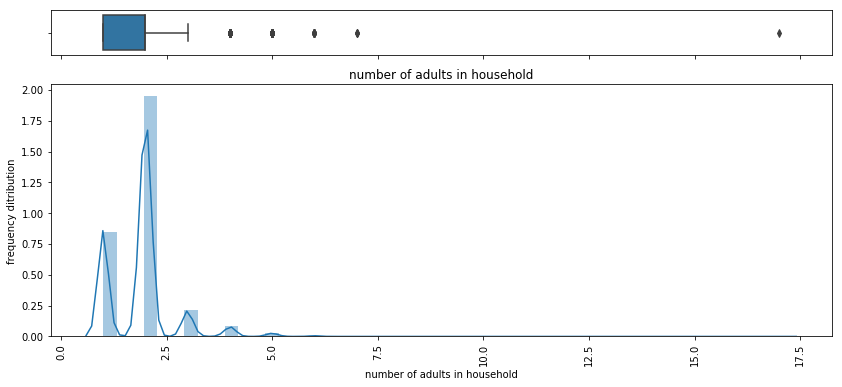

In [57]:
# Histogram of 'numadult'
# fill missing values with mean value
hs_plot_df["numadult"] = hs_plot_df["numadult"].fillna(np.mean(hs_plot_df.numadult)).round()
# Multiple plots boxplot and histograms in the same window
# Cut the window in 2 parts
f, (ax_box, ax_hist) = plt.subplots(2, figsize =(14,6),sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
 
# Add a graph in each part
sns.boxplot(hs_plot_df["numadult"], ax=ax_box)
sns.distplot(hs_plot_df["numadult"], ax=ax_hist) 
# Remove x axis name for the boxplot
ax_box.set(xlabel='')
plt.title('number of adults in household')
plt.xlabel('number of adults in household')
plt.ylabel('frequency ditribution')
plt.xticks(rotation='vertical')
#plt.legend(loc='best')
plt.show()

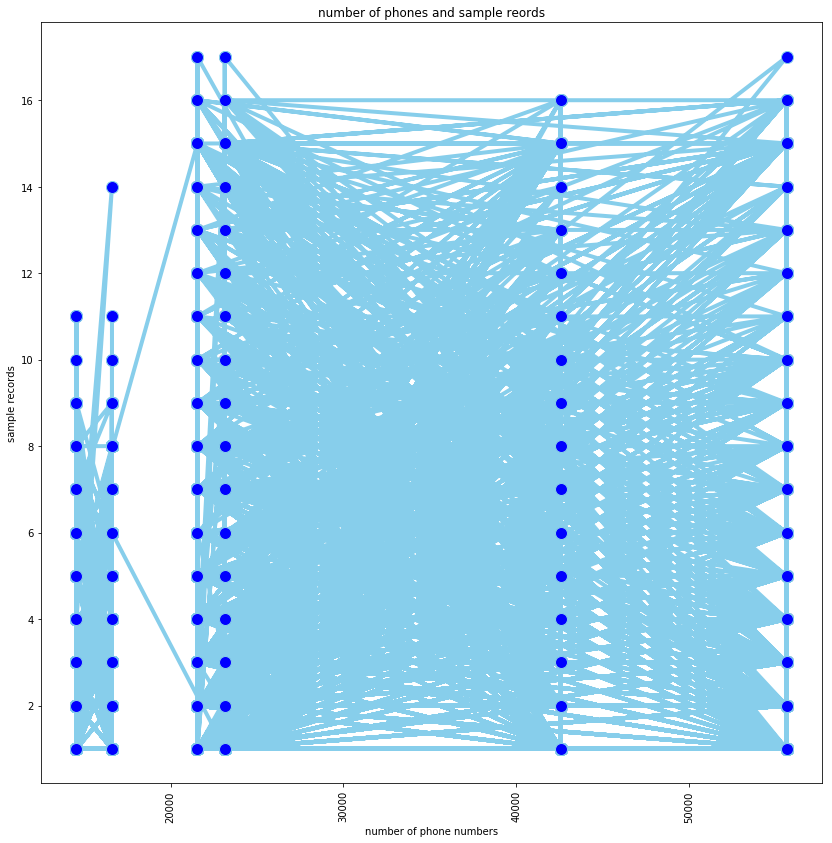

In [58]:
#numeric_df = hs_plot_df[['nrecstr','numadult','geostr','repdepth','iday','iyear','nattmpts','nrecsel']]

# scatter plot of 'nrecstr','numadult','geostr','repdepth','iday','iyear','nattmpts','nrecsel'

# multiple line plot
f, axes = plt.subplots(1, 1, figsize=(14, 14), sharex=True)
plt.plot( 'nrecsel', 'nattmpts', data=numeric_df, marker='o', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=4)
plt.title('number of phones and sample reords')
plt.xlabel('number of phone numbers')
plt.ylabel('sample records')
plt.xticks(rotation='vertical')
#plt.legend(loc='best')
plt.show()

In [59]:
numeric_df["numadult"] = numeric_df["numadult"].fillna(np.mean(numeric_df.numadult)).round()

C:\Users\yasser\Anaconda2\envs\pyt36\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


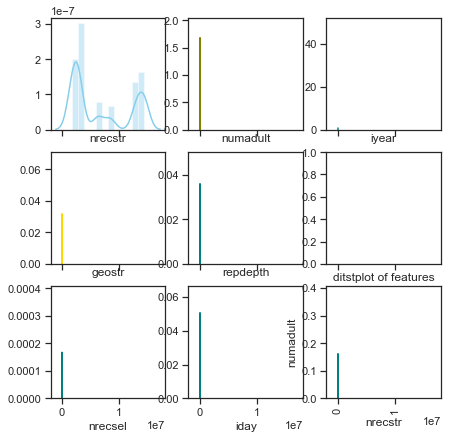

In [62]:
# plot multiple histograms on the same window
# scatter plot of 'nrecstr','numadult','geostr','repdepth','iday','iyear','nattmpts','nrecsel'

f, axes = plt.subplots(3, 3, figsize=(7, 7), sharex=True)
sns.distplot(numeric_df["nrecstr"], color="skyblue", ax=axes[0, 0])
sns.distplot(numeric_df["numadult"], color="olive", ax=axes[0, 1])
sns.distplot(numeric_df["geostr"],color="gold", ax=axes[1, 0])
sns.distplot(numeric_df["repdepth"], color="teal", ax=axes[1, 1])
sns.distplot(numeric_df["iyear"], color="teal", ax=axes[0, 2])
sns.distplot(numeric_df["iday"], color="teal", ax=axes[2, 1])
sns.distplot(numeric_df["nattmpts"], color="teal", ax=axes[2, 2])
sns.distplot(numeric_df["nrecsel"], color="teal", ax=axes[2, 0])
plt.title('ditstplot of features' )
plt.xlabel('nrecstr')
plt.ylabel('numadult')
plt.xticks(rotation='vertical')
#plt.legend(loc='best')
plt.show()

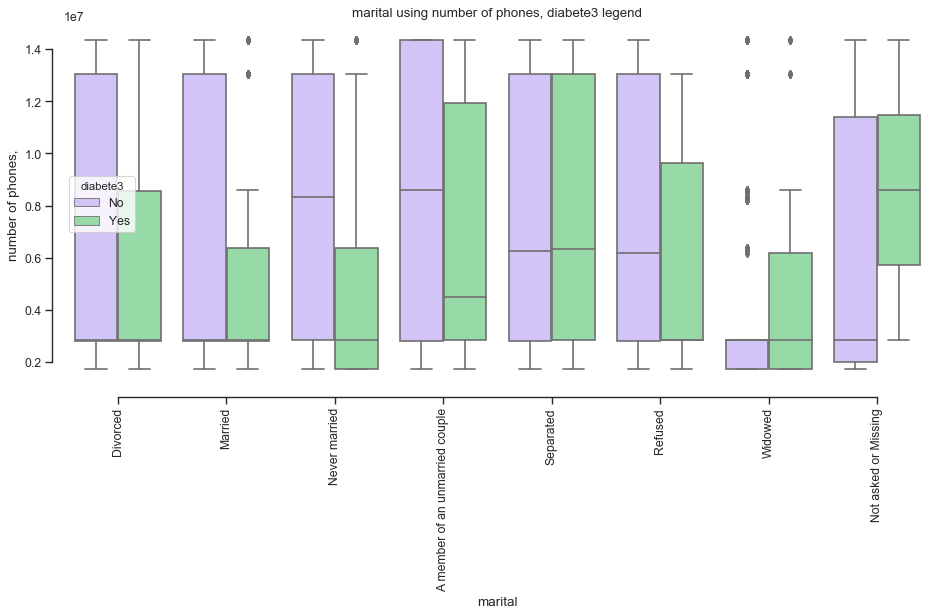

In [63]:
# grouped boxplot

sns.set(style="ticks", palette="pastel")

# Draw a nested boxplot to show bills by day and time
plt.figure(num=None, dpi=80,figsize =(14,6), facecolor='w', edgecolor='k')
#f, axes = plt.subplots(1, 1, figsize=(14, 14), sharex=True)
sns.boxplot(x="marital", y="nrecstr",
            hue="diabete3", palette=["m", "g"],
            data=hs_plot_df)
sns.despine(offset=10, trim=True)
plt.title('marital using number of phones, diabete3 legend' )
plt.xlabel('marital')
plt.ylabel('number of phones,')
plt.xticks(rotation='vertical')
#plt.legend(loc='best')
plt.show()

In [64]:
# feature exraction transformation and engineering
# text data were further cleaned to remove meta characters and get same type of data in each column
# feature were extracted using word3vec in text variables with very high number of categorical values
# Also numerical values such as Age was also categorised by biining into groups as seriousness of adverse drug effect
# varies with age groups.
# feature were extracted using word3vec in text variables with very high number of categorical values
# Also numerical values were also categorised by biining into groups

In [65]:
# select data

hs_feature_df = hs_clean_df.copy()

#hs_feature_df.info()

In [66]:
# fill in missing values in numadult with mean as the feature is skewed

hs_feature_df1 = hs_feature_df.copy()

# fill missing values
hs_feature_df1["numadult"] = hs_feature_df1["numadult"].fillna(np.mean(hs_feature_df1.numadult)).round()

# Replace values in imonth

hs_feature_df1["imonth"] = hs_feature_df1["imonth"].replace({'November': 11, 'October': 10,'December':12})

# display the columns
hs_feature_df1.numadult.unique(),  hs_feature_df1.imonth.unique()

(array([ 2.,  1.,  3.,  5.,  4.,  7.,  6., 17.]),
 array(['4', '3', 11, 10, '1', 12, '2', '6', '9', '5', '7', '8'],
       dtype=object))

In [67]:
# select data from data frame based on target data

# the target variable for this model building is 'diabete3'

hs_feature_df2 = hs_feature_df1.copy() # create dataframe for plots

''' 
select data where diabete3 is Yes or No, this will be used for modelling as these are
individuals where diabete3 is 100% and not recorded as conditional hence considered
best label for diabete3 modelling in the dataset.
Those on boderline or seen during pregnancy may not have other variable similar to diabete3 individuals
'''
# select diabete3 Yes and diabete3 No
hs_feature_df2 = hs_feature_df2[(hs_feature_df2.diabete3 == 'Yes') | (hs_feature_df2.diabete3 == 'No')]

# replace Yes with 1 and No with 0

hs_feature_df2["diabete3"] = hs_feature_df2["diabete3"].replace({'Yes': 1, 'No': 0})

# split age range column 'age'

hs_feature_df2["diabete3"].unique()

array([0, 1], dtype=int64)

In [70]:
hs_feature_df2.age.unique()

array(['Age 65 or older', 'Age 35 - 44', 'Age 18 - 24', 'Age 25 - 34',
       'Age 45 - 54', 'Age 55 - 64', 'Refused', 'Don\x92t know/Not sure'],
      dtype=object)

In [81]:
# split age range column
#'age'
hs_feature_df2a = hs_feature_df2.copy()

hs_feature_df2[['lower age','upper age']] = hs_feature_df2.age.str.split("-",expand=True,)
hs_feature_df2[['lower age','upper age']] = hs_feature_df2.age.str.split("or",expand=True,)
hs_feature_df2 = hs_feature_df2.drop('age', axis = 1)  # drop age column after transformation

In [82]:

# create dummy variables for text categorical variables and convert values to numbers
hs_feature_df3 = hs_feature_df2a.copy()

hs_feature_df3 = pd.get_dummies(hs_feature_df3)

hs_feature_df3.head(3)

,geostr,repdepth,iday,iyear,nattmpts,nrecsel,nrecstr,numadult,diabete3,precall_Pre-screened as non-working number,...,region_New York City (NYC),lower age_Age 18 - 24,lower age_Age 25 - 34,lower age_Age 35 - 44,lower age_Age 45 - 54,lower age_Age 55 - 64,lower age_Age 65,lower age_Dont know/Not sure,lower age_Refused,upper age_ older
0,201,28,25,2014,2,16600,14358760.86,2.0,0,0,...,0,0,0,0,0,0,1,0,0,1
1,202,17,16,2014,8,14544,13058665.94,2.0,0,0,...,1,0,0,0,0,0,1,0,0,1
2,201,4,29,2014,8,16600,14358760.86,2.0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [83]:
hs_feature_df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6690 entries, 0 to 6864
Columns: 409 entries, geostr to upper age_ older
dtypes: float64(2), int64(7), uint8(400)
memory usage: 3.1 MB


In [84]:
# Save the feature enginered dataframe to disk1 as a csv file

hs_feature_df3.to_csv("...../feature_df3.csv")   # save out the data to disc


In [36]:
hs_feature_df3 = pd.read_csv("...../feature_df3.csv",encoding='latin-1',na_values=' ')

hs_feature_df3 = hs_feature_df3.iloc[:, 1:400] # drop unnamed columns

In [37]:
# Select Features and target data, then split the model training and test data

target_df = hs_feature_df3['diabete3'].copy()  # target output

features_df = hs_feature_df3.drop('diabete3', axis = 1)  # features output

In [38]:
target_df.shape, features_df.shape

((6690,), (6690, 398))

In [39]:
features_df.columns

Index(['geostr', 'repdepth', 'iday', 'iyear', 'nattmpts', 'nrecsel', 'nrecstr',
       'numadult', 'precall_Pre-screened as non-working number',
       'precall_To be called',
       ...
       'hlthpreg_Not sure/dont know', 'hlthpreg_Refused', 'hlthpreg_Yes',
       'pregever_No', 'pregever_Not asked or Missing', 'pregever_Refused',
       'pregever_Yes', 'pfchldft_Not asked or Missing',
       'pfchldft_Number of days', 'region_NYS exclusive of NYC'],
      dtype='object', length=398)

In [40]:
# Feature Seletion  (selecting the best features to create a predictive model)
'''
Feature selection is useful on a variety of fronts: 
it is the best weapon against the Curse of Dimensionality;
it can reduce overall training times; 
it is a powerful defense against overfitting,
increasing generalizability
'''
a = 'a'

In [45]:
#1. Filter Method:
'''
Filter and take only the subset of the relevant features.
The model is built after selecting the features.
The filtering here is done using correlation matrix with Pearson correlation.
plot the Pearson correlation heatmap and see the correlation of independent variables with the output variable
select features which has correlation of above 0.5 (taking absolute value) with the output variable.
The correlation coefficient has values between -1 to 1
 — A value closer to 0 implies weaker correlation (exact 0 implying no correlation)
 — A value closer to 1 implies stronger positive correlation
 — A value closer to -1 implies stronger negative correlation
'''
# plot correlation

#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = hs_feature_df3.corr()

<Figure size 864x720 with 0 Axes>

In [46]:
#sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
#plt.show()

In [47]:
#Correlation with output variable
cor_target = abs(cor["diabete3"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.15]
#relevant_features

In [48]:
print(hs_feature_df3[["havarth3_Yes","useequip_Yes"]].corr())
print(hs_feature_df3[["diffwalk_Yes","pdiabtst_Yes"]].corr())

              havarth3_Yes  useequip_Yes
havarth3_Yes      1.000000      0.314929
useequip_Yes      0.314929      1.000000
              diffwalk_Yes  pdiabtst_Yes
diffwalk_Yes      1.000000     -0.028703
pdiabtst_Yes     -0.028703      1.000000


In [49]:
dict_relevant_features = relevant_features.to_dict()
#dict_relevant_features

In [50]:
corr_best_features = ['genhlth_Excellent','genhlth_Fair','genhlth_Poor','cvdinfr4_No','cvdinfr4_Yes','cvdcrhd4_No',
                'cvdcrhd4_Yes','havarth3_No','havarth3_Yes','age_Age 65 or older','employ1_Employed for wages',
                'employ1_Retired','qlactlm2_No','qlactlm2_Yes','useequip_No','useequip_Yes','blind_Yes',
                'diffwalk_No','diffwalk_Yes','alcday5_No drinks in past 30 days','pneuvac3_No',
                'pneuvac3_Yes','shingle2_Not asked or Missing','bldstool_Not asked or Missing',
                'pdiabtst_No','pdiabtst_Not asked or Missing','pdiabtst_Yes','prediab1_No',
                'prediab1_Not asked or Missing','bmi5cat_Obese','drocdy3_No Drink-Occasions per day',
                'flshot6_Age Less Than 65','pneumo2_Age Less Than 65','pneumo2_Yes',
                'rfblds2_Missing or Age less than 50','healthcl1_Not asked or Missing',
                'healthcl1_Yes','lifechg_Yes']



In [51]:
selected_features_df = features_df[corr_best_features]
selected_features_df.shape

(6690, 38)

In [52]:
selected_features_df.to_csv("....../features_df.csv")   # save out the data to disc

In [53]:
#5.1  Train test splitting
from __future__ import print_function
from sklearn.model_selection import train_test_split
from sklearn import metrics

# Make a train/test split using 20% test size
X_train, X_test, y_train, y_test = train_test_split(selected_features_df, target_df,
                                                    test_size=0.20,
                                                    random_state=21)

print("X_train dataset: ", X_train.shape)
print("y_train dataset: ", y_train.shape)
print("X_test dataset: ", X_test.shape)
print("y_test dataset: ", y_test.shape)

X_train dataset:  (5352, 38)
y_train dataset:  (5352,)
X_test dataset:  (1338, 38)
y_test dataset:  (1338,)


In [54]:
# Resample: Oversampling the training data using SMOTE
from imblearn.over_sampling import SMOTE

print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))

sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel())

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))

Before OverSampling, counts of label '1': 673
Before OverSampling, counts of label '0': 4679 

After OverSampling, the shape of train_X: (9358, 38)
After OverSampling, the shape of train_y: (9358,) 

After OverSampling, counts of label '1': 4679
After OverSampling, counts of label '0': 4679


In [55]:
# RFE(Recursive Feature Elimination)
# Recursive Feature Elimination (RFE) repeatedly constructs a model and choose either the best or worst
# recursively removing attributes and building a model on those attributes that remain
# performing features. The goal of RFE is to select features by recursively considering smaller 
# and smaller sets of features

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

#no of features
nof_list=np.arange(1,38)            
high_score=0
#Variable to store the optimum features
nof=0           
score_list =[]
for n in range(len(nof_list)):
    model = LogisticRegression(solver='lbfgs',max_iter=300, random_state=0)
    rfe = RFE(model,nof_list[n])
    # transform to scale training data
    X_train_rfe = rfe.fit_transform(X_train_res,y_train_res)
    #scale X_test
    X_test_rfe = rfe.transform(X_test)
    # fit model
    model.fit(X_train_rfe,y_train_res)
    # score model with test data
    score = model.score(X_test_rfe,y_test)
    # create a list to print features and scores
    score_list.append(score)
    if(score>high_score):
        high_score = score
        nof = nof_list[n]
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))

Optimum number of features: 2
Score with 2 features: 0.923019


In [56]:
# the optimum number of features is 2 features and fit 2 features get final set of features
cols = corr_best_features
model = LogisticRegression(solver='lbfgs',max_iter=300, random_state=0)
#Initializing RFE model
rfe = RFE(model, 2)             
#Transforming data using RFE
X_rfe = rfe.fit_transform(X_train_res,y_train_res)  
#Fitting the data to model
model.fit(X_rfe,y_train_res)              
temp = pd.Series(rfe.support_,index = cols)
selected_features_rfe = temp[temp==True].index
print(selected_features_rfe)

Index(['pdiabtst_Not asked or Missing', 'healthcl1_Not asked or Missing'], dtype='object')


In [57]:
# comment. Rfe using logistic regression to select most frequently used features 
# Only 2 features were selected based on the RFE using logistic regression for this dataset

In [58]:
# Feature Scaling, scale features for random forest classifier
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()  
X_train_sc = sc.fit_transform(X_train_res)
X_test_sc = sc.transform(X_test)  

C:\Users\yasser\Anaconda2\envs\pyt36\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\yasser\Anaconda2\envs\pyt36\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\yasser\Anaconda2\envs\pyt36\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  """


In [59]:
# Random forest
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
import xgboost as xgb
from sklearn.metrics import roc_auc_score
# Create a random forest Classifier. By convention, rf, put hyperparameters, default
rfc= RandomForestClassifier(random_state=0)
# Train the Classifier to take the X-training features and learn how they 
# relate to the y-training target independent variable
# fit model
model = rfc.fit(X_train_sc,y_train_res)


C:\Users\yasser\Anaconda2\envs\pyt36\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [60]:
# Evaluate Randomforest
print("classifier accuracy:", rfc.score(X_test, y_test))  # score model

classifier accuracy: 0.8026905829596412


In [61]:
from sklearn.metrics import confusion_matrix

# predict with best model
# Evaluate the classifier by using confusion matrix compare y predicted to actual y values
# Apply the trained Classifier to the X-test data and make predictions
rfy_pred = rfc.predict(X_test)  # use model to predict on test data for generalisation
y_true = y_test
# create confusion matrix

confusion_matrix(y_true, rfy_pred)

array([[1026,  143],
       [ 121,   48]], dtype=int64)

In [62]:
# feature Importance
# Rank of the importance of feature using random forest classifier
rfc.feature_importances_

array([5.26417455e-02, 2.59432253e-02, 7.96643972e-03, 1.41128108e-02,
       5.10506586e-03, 9.01837331e-03, 4.55921748e-03, 2.88667447e-02,
       1.43081965e-02, 1.18051798e-02, 3.98706409e-02, 1.78893715e-02,
       2.19063640e-02, 1.17628735e-02, 2.19681058e-02, 5.92332374e-03,
       6.61906294e-03, 2.62868219e-02, 9.53081041e-03, 1.19114729e-02,
       2.93035169e-02, 1.24419476e-02, 2.09037188e-02, 1.94319102e-02,
       6.40058046e-05, 2.41125970e-01, 1.12953026e-02, 3.70308985e-02,
       6.05954686e-02, 2.60331632e-02, 1.82519130e-02, 1.00074496e-02,
       9.85583407e-03, 5.67302937e-03, 1.12918168e-02, 1.33736931e-01,
       9.80731601e-04, 3.98054593e-03])

In [63]:
# feature importance

feature_importances = pd.DataFrame(rfc.feature_importances_,index = selected_features_df.columns,
                                   columns=['importance']).sort_values('importance',ascending=False)

In [64]:
feature_importances.head()

,importance
pdiabtst_Not asked or Missing,0.241126
healthcl1_Not asked or Missing,0.133737
prediab1_Not asked or Missing,0.060595
genhlth_Excellent,0.052642
employ1_Employed for wages,0.039871


In [65]:
# Grid search optimisation
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.model_selection import RandomizedSearchCV

target_names = ['class 0', 'class 1']
print(classification_report(y_true, rfy_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.89      0.88      0.89      1169
     class 1       0.25      0.28      0.27       169

   micro avg       0.80      0.80      0.80      1338
   macro avg       0.57      0.58      0.58      1338
weighted avg       0.81      0.80      0.81      1338



In [66]:
# comment
# The precision, recall and f1 scores for class 1 are blow 0.5 based on random forest classifier
# hence would require hyper parameter tuning to improcve prediction performance

In [68]:
# Gradient Boost (gb) classifier
'''
Boosting is a sequential technique which works on the principle of ensemble. It combines a set of weak learners and delivers
improved prediction accuracy. At any instant t, the model outcomes are weighed based on the outcomes of previous instant t-1.
The outcomes predicted correctly are given a lower weight and the ones miss-classified are weighted higher. This technique is
followed for a classification problem while a similar technique is used for regression.
A.Tree-Specific Parameters: These affect each individual tree in the model.
1.min_samples_split,
2.min_samples_leaf,
3.min_weight_fraction_leaf,
4.max_depth,max_depth. This indicates how deep the built tree can be. The deeper the tree, the more splits it has and it
captures more information about how the data. We fit a decision tree with depths ranging from 1 to 32 and plot the training
and test errors
5.max_leaf_nodes,
6.max_features,)
2.Boosting Parameters: These affect the boosting operation in the model. adaptive boosting and gradient boosting
(1.learning_rate learning rate shrinks the contribution of each tree by learning_rate
2.n_estimators,the number of trees in the forest. Usually the higher the number of trees the better to learn the data.
However, adding a lot of trees can slow down the training process considerably
3.subsample,)
3.Miscellaneous Parameters: Other parameters for overall functioning eg regularisation to reduce overfitting (
1.loss,)
'''
#boosting controls both the aspects (bias & variance),
a ='a'

In [69]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import cross_validate
from sklearn.metrics.scorer import make_scorer
from sklearn.metrics import confusion_matrix
from sklearn.svm import LinearSVC



In [70]:
# adaptive booting

# AdaBoost Algorithm
from sklearn.ensemble import AdaBoostClassifier
adboost = AdaBoostClassifier()
# n_estimators = 50 (default value) 
# base_estimator = DecisionTreeClassifier (default value)
adboost.fit(X_train_sc, y_train_res)
adboost_pred = adboost.predict(X_test)


In [71]:
# gradient booting

gbc = GradientBoostingClassifier(criterion='friedman_mse', init=None,learning_rate=0.1, loss='deviance', max_depth=3,
                                 max_features=37, max_leaf_nodes=None, min_samples_leaf=1,
                                 min_samples_split=2, min_weight_fraction_leaf=0.0, n_estimators=100, presort='auto',
                                 random_state=None, subsample=1.0, verbose=0, warm_start=False)

#fit model
gbc.fit(X_train_sc, y_train_res)
# predict
#gbcy_pred = model.predict(X_test_sc)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=37, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [72]:
# XGBoost 
from xgboost import XGBClassifier
xgb = XGBClassifier(max_depth=10, learning_rate=0.1, n_estimators=100, verbosity=1, silent=None, objective='binary:logistic',
                    booster='gbtree', n_jobs=1, nthread=None, gamma=0, min_child_weight=1, max_delta_step=0, subsample=1,
                    colsample_bytree=1, colsample_bylevel=1, colsample_bynode=1, reg_alpha=0, reg_lambda=1,
                    scale_pos_weight=1, base_score=0.5, random_state=0, seed=None, missing=None)
# n_estimators = 100 (default)
# max_depth = 3 (default)
xgb.fit(X_train_sc, y_train_res)
xgb_predict = xgb.predict(X_test_sc)

[14:10:05] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 178 extra nodes, 0 pruned nodes, max_depth=10
[14:10:05] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 168 extra nodes, 0 pruned nodes, max_depth=10
[14:10:05] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 176 extra nodes, 0 pruned nodes, max_depth=10
[14:10:05] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 184 extra nodes, 0 pruned nodes, max_depth=10
[14:10:05] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 182 extra nodes, 0 pruned nodes, max_depth=10
[14:10:05] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 186 extra nodes, 0 pruned nodes, max_depth=10
[14:10:05] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 178 extra nodes, 0 pruned nodes, max_depth=10
[14:10:05] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 172 extra nodes, 0 pruned nodes, max_depth=10
[14:10:05] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 178 extra nodes, 0 p

In [75]:
# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, xgb_predict))

Accuracy: 0.8707025411061285


In [76]:
from sklearn.metrics import classification_report
target_names = ['class 0', 'class 1']
print(classification_report(y_test, xgb_predict, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.95      0.90      0.92      1169
     class 1       0.49      0.64      0.56       169

   micro avg       0.87      0.87      0.87      1338
   macro avg       0.72      0.77      0.74      1338
weighted avg       0.89      0.87      0.88      1338



In [77]:
# XBG parameters
'''
XGBoost's hyperparameters
The most common are:

learning_rate: step size shrinkage used to prevent overfitting. Range is [0,1]
max_depth: determines how deeply each tree is allowed to grow during any boosting round.
subsample: percentage of samples used per tree. Low value can lead to underfitting.
colsample_bytree: percentage of features used per tree. High value can lead to overfitting.
n_estimators: number of trees you want to build.
objective: determines the loss function to be used like reg:linear for regression problems, reg:logistic for
classification problems with only decision, binary:logistic for classification problems with probability.
XGBoost also supports regularization parameters to penalize models as they become more complex and reduce them
to simple (parsimonious) models.

gamma: controls whether a given node will split based on the expected reduction in loss after the split. A higher
value leads to fewer splits. Supported only for tree-based learners.
alpha: L1 regularization on leaf weights. A large value leads to more regularization.
lambda: L2 regularization on leaf weights and is smoother than L1 regularization.
It's also worth mentioning that though you are using trees as your base learners, 
XGBoost's relatively less popular linear base learners and one other tree learner known as dart can be used. 
set the booster parameter to either gbtree (default),gblinear or dart.
'''
a ='a'

In [78]:
'''def predicted_vs_actual_sale_price_xgb(self, xgb_params, x_train, y_train, seed, title_name):
        # Split the training data into an extra set of test
        x_train_split, x_test_split, y_train_split, y_test_split = train_test_split(x_train, y_train)
        dtrain_split = xgb.DMatrix(x_train_split, label=y_train_split)
        dtest_split = xgb.DMatrix(x_test_split)

        res = xgb.cv(xgb_params, dtrain_split, num_boost_round=1000, nfold=4, seed=seed, stratified=False,
                     early_stopping_rounds=25, verbose_eval=10, show_stdv=True)

        best_nrounds = res.shape[0] - 1
        print(np.shape(x_train_split), np.shape(x_test_split), np.shape(y_train_split), np.shape(y_test_split))
        gbdt = xgb.train(xgb_params, dtrain_split, best_nrounds)
        y_predicted = gbdt.predict(dtest_split)
        plt.figure(figsize=(10, 5))
        plt.scatter(y_test_split, y_predicted, s=20)
        rmse_pred_vs_actual = self.rmse(y_predicted, y_test_split)
        plt.title(''.join([title_name, ', Predicted vs. Actual.', ' rmse = ', str(rmse_pred_vs_actual)]))
        plt.xlabel('Actual Sale Price')
        plt.ylabel('Predicted Sale Price')
        plt.plot([min(y_test_split), max(y_test_split)], [min(y_test_split), max(y_test_split)])
        plt.tight_layout() '''
a ='a'

In [84]:
#XGB cross validation, 
#data_dmatrix = xgb.DMatrix(X_train_sc, label=y_train_res)
#dtest_dmatrix = xgb.DMatrix(X_test_sc)

#params = {"objective":"reg:linear",'colsample_bytree': 0.3,'learning_rate': 0.1,
#                'max_depth': 5, 'alpha': 10}

#cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=3,num_boost_round=50,early_stopping_rounds=10,
#                    metrics="auc", as_pandas=True, seed=123)

In [85]:
#print((cv_results["test-auc-mean"]).tail(1))

In [87]:
'''
use get_booster() instead of booster()

print("Best Iteration: {}".format(clf.get_booster().best_iteration))
To use the number of the best iteration when you predict, you have a parameter called ntree_limit which specify the number
of boosters to use. And the value generated from the training process is best_ntree_limit which can be called after training
your model in the following matter: clg.get_booster().best_ntree_limit. More specifically when you predict, use:

best_iteration = clg.get_booster().best_ntree_limit
predict(data, ntree_limit=best_iteration)
You can print your training and evaluating process if you specify those parameters in the .fit() command

clf.fit(X_train, y_train,
        eval_set = [(X_train, y_train), (X_val, y_val)],
        eval_metric = 'rmse',
        early_stopping_rounds = 10, verbose=True)
NOTE: early_stopping_rounds parameter should be in the .fit() command not in the XGBRegressor() instantiation.

Another NOTE: verbose = 50 in XGBRegressor() is redundant. The verbose variable should be in your .fit() function and is True
or False. For what the verbose=True do, read here under the verbose section. It is directly affects your 3rd question.
'''
a ='a'

In [90]:
#import graphviz
#from graphviz import Digraph

In [92]:
'''xg_reg = xgb.train(params=params, dtrain=data_dmatrix, num_boost_round=10)

import matplotlib.pyplot as plt

#xgb.plot_tree(xg_reg,num_trees=0)
#plt.rcParams['figure.figsize'] = [50, 10]

xgb.to_graphviz(xgb, num_trees=xgb.best_iteration())
plt.show()
'''
a ='a'

In [93]:
#xgb.plot_importance_

In [ ]:
# Fit Knn model

In [94]:
'''
KNN falls in the supervised learning family of algorithms. Informally, this means that given a labelled dataset
consiting of training observations (x,y) and would like to capture the relationship between x and y. More formally,
our goal is to learn a function h:X→Y so that given an unseen observation x, h(x) can confidently predict the
corresponding output y.
The KNN classifier is a non parametric and instance-based learning algorithm.
Non-parametric means it makes no explicit assumptions about the functional form of h, avoiding the dangers of
mismodeling the underlying distribution of the data. For example, suppose our data is highly non-Gaussian but
the learning model we choose assumes a Gaussian form. In that case, our algorithm would make extremely poor predictions.
Instance-based learning means that our algorithm doesn’t explicitly learn a model. Instead, it chooses to memorize the
training instances which are subsequently used as “knowledge” for the prediction phase. Concretely, this means that only
when a query to our database is made (i.e. when we ask it to predict a label given an input), will the algorithm use the
training instances to spit out an answer.KNN is non-parametric, instance-based and used in a supervised learning setting.
Disadvantage
It is worth noting that the minimal training phase of KNN comes both at a memory cost, since we must store a potentially
huge data set, as well as a computational cost during test time since classifying a given observation requires a run
down of the whole data set. Practically speaking, this is undesirable since we usually want fast responses.
'''
#Import knearest neighbors Classifier model
from sklearn.neighbors import KNeighborsClassifier

#Create KNN Classifier using resampled data
knn = KNeighborsClassifier(n_neighbors=7)

#Train the model using the training sets
knn.fit(X_train_sc, y_train_res)

#Predict the response for test dataset
knny_pred = knn.predict(X_test_sc)


In [95]:

# create confusion matrix

confusion_matrix(y_true, knny_pred)
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, knny_pred))

Accuracy: 0.8654708520179372


In [96]:
print(knn.classes_)

[0 1]


In [97]:
target_names = ['class 0', 'class 1']
print(classification_report(y_true, knny_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.95      0.89      0.92      1169
     class 1       0.48      0.67      0.56       169

   micro avg       0.87      0.87      0.87      1338
   macro avg       0.71      0.78      0.74      1338
weighted avg       0.89      0.87      0.87      1338



In [98]:
# K nearest neighbour knn precision, recall and f1 score are better than that of random forest and logistoic regression

In [99]:
#Import svm model
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train_sc, y_train_res)

#Predict the response for test dataset
svmy_pred = clf.predict(X_test_sc)
# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, svmy_pred))

Accuracy: 0.8303437967115097


In [100]:
target_names = ['class 0', 'class 1']
print(classification_report(y_true, svmy_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.97      0.83      0.90      1169
     class 1       0.41      0.82      0.55       169

   micro avg       0.83      0.83      0.83      1338
   macro avg       0.69      0.82      0.72      1338
weighted avg       0.90      0.83      0.85      1338



In [101]:
# The precision , recall and f1 scores is less than the result for Knn

In [102]:
#Bagging algorithms, which controls high variance in a model using averaging

In [103]:
# Bagging based Ensembling. Using a Bagged Decision Tree.
# Bagged Decision Trees for Classification - necessary dependencies

from sklearn import model_selection
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier



kfold = model_selection.KFold(n_splits=10, random_state=7)
cart = DecisionTreeClassifier()
num_trees = 100
model = BaggingClassifier(base_estimator=cart, n_estimators=num_trees, random_state=7)
results = model_selection.cross_val_score(model, X_train_sc, y_train_res, cv=kfold)
print(results.mean())

0.9106687919923215


In [104]:
#Train the model using the training sets
model.fit(X_train_sc, y_train_res)

#Predict the response for test dataset
bagg_pred = model.predict(X_test_sc)

In [105]:
target_names = ['class 0', 'class 1']
print(classification_report(y_true, bagg_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.95      0.90      0.92      1169
     class 1       0.48      0.65      0.55       169

   micro avg       0.87      0.87      0.87      1338
   macro avg       0.71      0.77      0.74      1338
weighted avg       0.89      0.87      0.88      1338



In [106]:
# The bagging classifier also gave a improved class 1 precision, recall and f1 score however the performance is less than knn

In [107]:
# Difference between actual and predicted values

In [108]:
# Using the test data to compare the Actual and predicted values

# Create new dataframe to store test data.
prediction_df = pd.DataFrame(X_test)
prediction_df['Target'] = y_test
prediction_df['y_pred'] = knny_pred.tolist()  


In [109]:
prediction_df.head()

,genhlth_Excellent,genhlth_Fair,genhlth_Poor,cvdinfr4_No,cvdinfr4_Yes,cvdcrhd4_No,cvdcrhd4_Yes,havarth3_No,havarth3_Yes,age_Age 65 or older,...,drocdy3_No Drink-Occasions per day,flshot6_Age Less Than 65,pneumo2_Age Less Than 65,pneumo2_Yes,rfblds2_Missing or Age less than 50,healthcl1_Not asked or Missing,healthcl1_Yes,lifechg_Yes,Target,y_pred
2190,0,0,0,1,0,1,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
3923,0,0,1,0,1,0,1,0,1,1,...,1,0,0,1,0,1,0,0,1,1
5875,1,0,0,1,0,1,0,1,0,0,...,0,1,1,0,1,1,0,0,0,0
2420,0,0,0,1,0,1,0,1,0,0,...,0,1,1,0,1,1,0,0,0,0
1299,0,1,0,1,0,1,0,1,0,0,...,1,1,1,0,1,1,0,0,0,0


In [110]:
prediction_df1 = prediction_df.copy()

prediction_output_df = prediction_df[['Target','y_pred']]

In [192]:
prediction_output_df.head()

,Target,y_pred
2190,0,0
3923,1,1
5875,0,0
2420,0,0
1299,0,0


In [193]:
# The difference between the target and the predicted

prediction_diff_df = prediction_output_df.copy()

prediction_diff_df['pred_diff'] = prediction_diff_df['Target'] - prediction_diff_df['y_pred']

In [194]:
prediction_diff_df.head()

,Target,y_pred,pred_diff
2190,0,0,0
3923,1,1,0
5875,0,0,0
2420,0,0,0
1299,0,0,0


In [ ]:
# The difference between the predicted value and the target value reveals the misrepresentation
# of the target values